## Environment Setting

In [1]:
# External API
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np

# Part of External API
from operator import itemgetter
from pandas import Series, DataFrame
import pandas as pd

# Own code API
import TextminingPlsa
from stopwords import stopwords

## Load Data Set

In [2]:
df_w = pd.read_csv('./data/Walmart_word.csv', encoding='cp949')
print(df_w.shape)
df_w.head()

(14877, 2)


,Unnamed: 0,col
0,0,amaze
1,1,product
2,2,accuracy
3,3,recognize
4,4,say


In [3]:
df_w = df_w.drop(df_w.columns[0], axis = 1)
print(df_w.shape)

(14877, 1)


## Implementation of pLSA

In [4]:
corpus = TextminingPlsa.Corpus()

In [5]:
walList = df_w['col'].values.tolist()
print(len(walList))

14877


In [6]:
len(stopwords)

597

In [7]:
stopWalList = [word for word in walList if word not in stopwords]
print(len(stopWalList))

7701


In [8]:
corpus.add_document(stopWalList)

In [9]:
voca = corpus.build_vocabulary()
print(len(voca))

1935


In [10]:
def visualization_likelihod(value_list):
    plt.plot(value_list, c="b", lw=2, ls="--", marker="o", ms=5, mec="g", mew=2, mfc="r")

    plt.xlabel('$Iteration$', fontsize=14)
    plt.title('Log-Likelihood for Optimization', fontsize=20)
    plt.ylabel('$Value$', fontsize=14)
    plt.tight_layout()
    plt.show()

In [11]:
result = corpus.plsa(number_of_topics=3, max_iter=100, lambda_b=.2) # all data set:0.6
print(result[2].shape, result[3].shape)

EM iteration begins...
Initializing...
Iteration #1...
Iteration #2...
Iteration #3...
Iteration #4...
Iteration #5...
Iteration #6...
Iteration #7...
Iteration #8...
Iteration #9...
(3, 1935) (1, 3)


In [12]:
result[0]

0.2

In [13]:
max(result[1])

-49868.035704139525

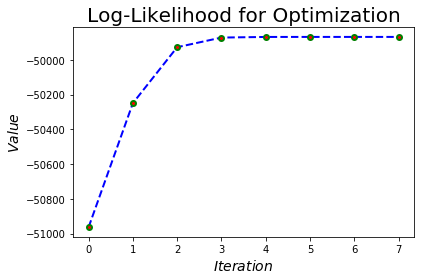

In [14]:
visualization_likelihod(result[1])

In [15]:
topic_word_list = []
for row in range(result[2].shape[0]):
    for col in range(result[2].shape[1]):
        topic_word_list.append((voca[col], result[2][row][col]))

print(len(topic_word_list), topic_word_list)

5805 [('immediately', 7.68011214372637e-05), ('lighting', 0.00013335483009765405), ('translate', 0.0004645798793715714), ('dog', 0.00042000542384842331), ('superb', 0.00023639865051081557), ('service', 0.0045273764368268824), ('math', 0.00024929405649954577), ('helpful', 0.0034649441131958353), ('angrier', 0.00015027065285440404), ('fine', 0.0008711170296182816), ('fast', 0.00082114012904831374), ('converse', 6.72240651986105e-05), ('creature', 0.00016179473288321274), ('retailer', 0.00014329294694458611), ('bart', 0.00020306564402528695), ('okay', 0.00069701740625538293), ('pop', 0.00047474888686392116), ('tune', 0.00016915428192832061), ('exchange', 0.00014365301417924341), ('activation', 0.00031077649360608598), ('sufficiently', 7.8229567149012771e-05), ('ability', 0.0010921205620772689), ('entirely', 0.00021361256747953636), ('idea', 0.00060002273856159987), ('comparison', 0.00030008992474278779), ('family', 0.0072405197857239771), ('integrate', 0.0013418675231654537), ('listen', 0

In [16]:
topic1 = topic_word_list[:1*len(voca)]
topic2 = topic_word_list[1*len(voca):2*len(voca)]
topic3 = topic_word_list[2*len(voca):3*len(voca)]
#topic4 = topic_word_list[3*len(voca):4*len(voca)]

In [17]:
topic1= sorted(topic1, key=itemgetter(1), reverse=True)
topic1_word = [wordFreq[0] for wordFreq in topic1]
topic2 =sorted(topic2, key=itemgetter(1), reverse=True)
topic2_word = [wordFreq[0] for wordFreq in topic2]
topic3 =sorted(topic3, key=itemgetter(1), reverse=True)
topic3_word = [wordFreq[0] for wordFreq in topic3]
#topic4 =sorted(topic4, key=itemgetter(1), reverse=True)
#topic4_word = [wordFreq[0] for wordFreq in topic4]

In [18]:
making_data = {
    'Topic1': [topic1_word[0], topic1_word[1], topic1_word[2], topic1_word[3], topic1_word[4]],
    'Topic2': [topic2_word[0], topic2_word[1], topic2_word[2], topic2_word[3], topic2_word[4]],
    'Topic3': [topic3_word[0], topic3_word[1], topic3_word[2], topic3_word[3], topic3_word[4]],
    #'Topic4': [topic4_word[0], topic4_word[1], topic4_word[2], topic4_word[3], topic4_word[4]]
}

In [19]:
result_data = DataFrame(making_data)
print(result_data)

     Topic1      Topic2  Topic3
0    google      google  google
1      home        home    home
2     learn        echo    echo
3      list  thermostat  amazon
4  calendar      amazon  search


In [20]:
df1 = pd.DataFrame(topic1[:30])
df2 = pd.DataFrame(topic2[:30])
df3 = pd.DataFrame(topic3[:30])
#df4 = pd.DataFrame(topic4[:30])

In [21]:
resultTable = pd.concat([df1,df2,df3], axis=1)
resultTable

,0,1,0,1,0,1
0,google,0.053427,google,0.101531,google,0.090414
1,home,0.023098,home,0.058987,home,0.066099
2,learn,0.010096,echo,0.046470,echo,0.029926
3,list,0.010083,thermostat,0.010943,amazon,0.018628
4,calendar,0.009310,amazon,0.010559,search,0.008237
5,amazon,0.008451,news,0.010165,purchase,0.007344
6,quality,0.008164,family,0.008814,alarm,0.007002
7,item,0.007252,youtube,0.008718,listen,0.006642
8,family,0.007241,worth,0.007792,assistant,0.005542
9,order,0.006836,system,0.006814,control,0.005361


In [22]:
resultTable.to_csv('./result/topic_modeling_result_walmart.csv')